## Testing Git & GitHub

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import requests

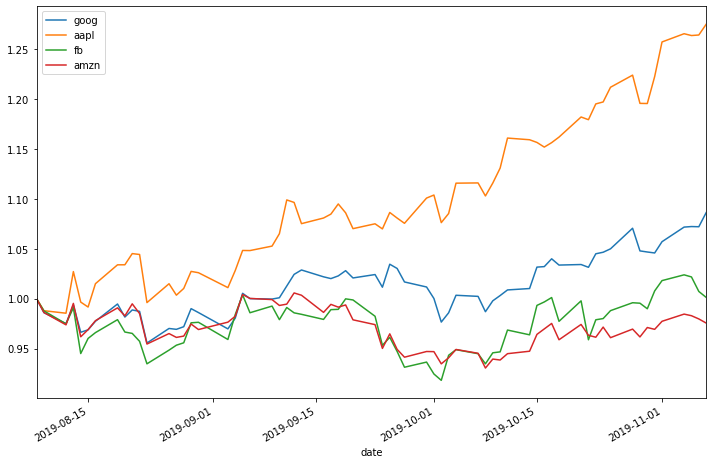

In [2]:
stocks = ["goog", "aapl", "fb", "amzn"]
public_api_key = "pk_5e5f890a2ac14367868016012a4e04ed"

stocks_df = None
for stock in stocks:
    data = requests.get(f"https://cloud.iexapis.com/stable/stock/{stock}/chart/3m?token={public_api_key}").json()
    stock_df = pd.DataFrame.from_dict(data)
    stock_df['date'] = pd.to_datetime(stock_df['date'], format="%Y-%m-%d")
    stock_df = stock_df.set_index('date')
    stock_df = stock_df[["close"]]
    stock_df.columns = [ stock ]
    stock_df = stock_df / stock_df[stock][0] # Normalization at t=0
    if stocks_df is None:
        stocks_df = stock_df
    else:
        stocks_df = stocks_df.join(stock_df)

stocks_df.plot(figsize=(12,8))